In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# horse racing files 
race_details_path = "Resources/race_details_20240101_20240131.csv"
race_results_path = "Resources/race_results_20240101_20240131.csv"

# Read both datasets
race_details = pd.read_csv(race_details_path)
race_results = pd.read_csv(race_results_path)

# Combine the data into a single DataFrame

# Merge the datasets on the columns 'race_date', 'race_city', and 'race_no'
combined = pd.merge(race_details, race_results, on=['race_date', 'race_city', 'race_no'])

# Save the merged DataFrame to a new CSV file
combined.to_csv('path_to_combined_dataset.csv', index=False)

# Display the data table for preview

combined.head()

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51


In [5]:
# Save the cleaned DataFrame to a new CSV file
clean.to_csv('clean.csv', index=False)

NameError: name 'clean' is not defined

In [ ]:
#data cleaning
#columns to drop: horse_origin, 
clean = combined.drop(['horse_origin'], axis=1)

#columns to clean: horse_age(drop 'y')

clean['horse_age'] = combined['horse_age'].str.replace('y', '', regex=False)
clean

In [6]:
#Check unique counts for each column to explore the perspectives we should be analyzing

for column in clean.columns:
    unique_value_count = clean[column].nunique()
    print(f"Unique value count in {column}: {unique_value_count}")

Unique value count in race_date: 31
Unique value count in race_city: 7
Unique value count in race_no: 9
Unique value count in race_type: 20
Unique value count in race_sex_group: 2
Unique value count in race_age_group: 3
Unique value count in race_race_group: 2
Unique value count in race_length: 11
Unique value count in race_track_type: 2
Unique value count in race_track_condition: 4
Unique value count in best_rating: 101
Unique value count in result: 19
Unique value count in horse_name: 2468
Unique value count in horse_accessories: 61
Unique value count in horse_age: 9
Unique value count in horse_sex: 2
Unique value count in horse_sire: 397
Unique value count in horse_dam: 2149
Unique value count in hors_broodmare_sire: 584
Unique value count in jockey_weight: 15
Unique value count in jockey_name: 189
Unique value count in horse_owner: 1422
Unique value count in horse_trainer: 476
Unique value count in horse_race_degree: 3169
Unique value count in horse_win_value: 1093
Unique value cou

In [16]:
#Find out race type distribution#What are the counts of each race type? 

race_type_counts = clean['race_type'].value_counts()
race_type_counts


race_type
Maiden         1015
Handicap 14     610
Condition 3     503
Handicap 15     470
Condition 4     441
Handicap 16     219
Condition 2     184
Condition 5     163
Condition-6     150
Handicap 13     104
Condition-8      94
Condition 1      85
Handicap 21      63
Handicap 17      57
Sale 1           51
Sale 2           33
Condition-7      16
G 3              15
Sale 3            6
Condition-9       4
Name: count, dtype: int64

In [20]:
#Since there are a lot of race types to display, we are using Pareto rule
#find out the race types that make up 80% of the total race types and aggregate other types as one variable.

total_races = race_type_counts.sum()
race_type_percentages = race_type_counts / total_races

# Calculate cumulative percentage and find the 80% threshold
#calculate comulative percentage of each type
cumulative_percentage = np.cumsum(race_type_percentages)
#filter down to only the ones
race_types_80 = race_type_percentages[cumulative_percentage <= 0.80]
other_percentage = 1 - race_types_80.sum()

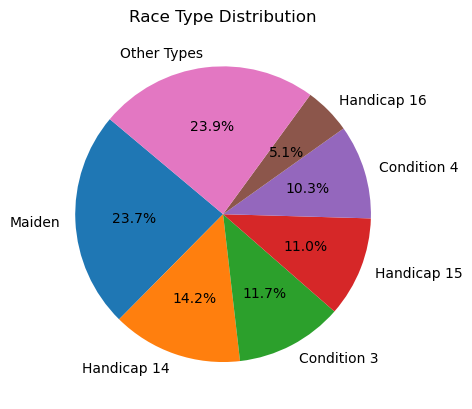

In [23]:


# Creating a new Series for the plot
plot_type_distribution = race_types_80

#Add other types to plot_data
if other_percentage > 0:
    plot_type_distribution['Other Types'] = other_percentage

# Plotting
plot_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Race Type Distribution')
plt.ylabel('')  
plt.show()


In [38]:
# Calculate the total number of unique races
#Count the unique values of the combination of race date, race city and race number should produce the total race numbers

unique_races = clean.drop_duplicates(subset=['race_date', 'race_city', 'race_no'])

# Count the unique races
total_race_count = unique_races.shape[0]

print(f"Total number of races: {total_race_count}")

Total number of races: 480


In [39]:
# Create a unique identifier for each race. This added one column to the dataframe
clean['unique_race_identifier'] = clean['race_date'].astype(str) + '_' + clean['race_city'].astype(str) + '_' + clean['race_no'].astype(str)

# Group by 'race_sex_group' and count unique 'unique_race_identifier'
races_per_sex_group = clean.groupby('race_sex_group')['unique_race_identifier'].nunique()

print(races_per_sex_group)

race_sex_group
Female       118
Undefined    362
Name: unique_race_identifier, dtype: int64


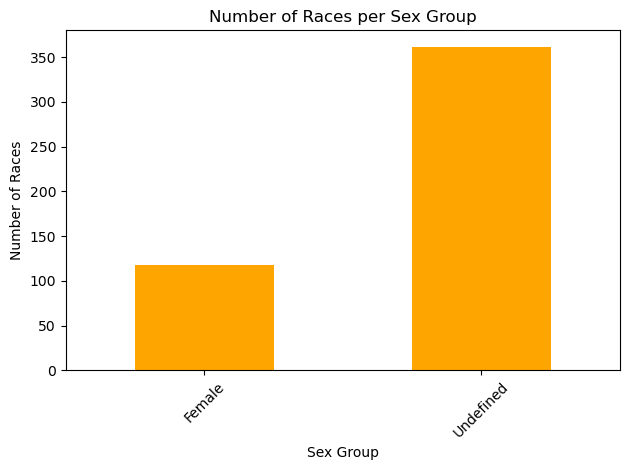

In [44]:
#Plot

races_per_sex_group.plot(kind='bar', color='orange')
plt.title('Number of Races per Sex Group')
plt.xlabel('Sex Group')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

In [49]:
#Which starting box numbers are likely to have more wins?
# Not every race has the same number of starting boxes. Some can be more and some less. 
#So firstly we count how many 
box_start_counts = clean['Horse_starting_box_no'].value_counts()
box_start_counts

Horse_starting_box_no
2     475
3     473
1     472
4     467
5     463
6     420
7     360
8     313
9     249
10    200
11    144
12     96
13     63
14     44
15     21
16     13
17      6
18      4
Name: count, dtype: int64

In [46]:
#Which starting box numbers are likely to have more wins?
rank_1_df = clean[clean['result'] == 1]

# Count occurrences of each 'Horse_starting_box_no' in the filtered DataFrame
box_start_counts = rank_1_df['Horse_starting_box_no'].value_counts()

print(box_start_counts)

Horse_starting_box_no
3     59
4     58
1     57
2     57
5     56
6     55
7     33
8     30
9     24
10    21
11    11
12     9
14     5
13     3
16     2
15     1
Name: count, dtype: int64


In [6]:
# find the top 10 sires that had the most horses place 
unique_sires = combined['horse_sire'].nunique()
unique_dames = combined['horse_dam'].nunique()
unique_dames = combined['horse_dam'].nunique()
unique_brood_sire = combined['hors_broodmare_sire'].nunique()

print(f'There are {unique_sires} unique sires in the dataset')
print(f'There are {unique_dames} unique dames in the dataset')
print(f'There are {unique_brood_sire} unique broodmare sires in the dataset')

#Knowing that there are so many horses in the dataset, lets find the top 10 sires and top 10 broodmare sires
#Cut the data set to horses that win aka dataset where result = 1



There are 397 unique sires in the dataset
There are 2149 unique dames in the dataset
There are 584 unique broodmare sires in the dataset


In [54]:
#Knowing that there are so many horses in the dataset, lets find the top 10 sires and top 10 broodmare sires
#Cut the data set to horses that win aka dataset where result = 1
winner_set = combined[combined['result'] == 1]
winner_set = winner_set[['horse_sire', 'hors_broodmare_sire', 'result']]

#remove origin place from name of horses
def remove_parentheses(text):
    import re
    return re.sub(r'\([^)]*\)', '', text)

# Apply the function to each column in the DataFrame
winner_set['horse_sire'] =winner_set['horse_sire'].apply(remove_parentheses)
winner_set['hors_broodmare_sire'] = winner_set['hors_broodmare_sire'].apply(remove_parentheses)

#remove unaccounted for broodmare sires from the dataset
winner_set = winner_set[winner_set['hors_broodmare_sire'] != 'UNACCOUNTED FOR ']

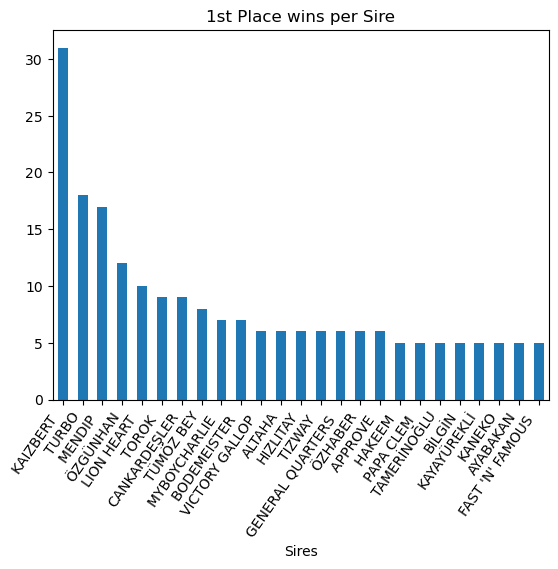

In [56]:
#Show which 10 horse sires show up the most in the list
sire_win_core = winner_set['horse_sire'].value_counts().head(25)

sire_win_core.plot(kind = 'bar')
plt.title('1st Place wins per Sire')
plt.xlabel('Sires')
plt.xticks(rotation=55, ha = 'right')
plt.show()

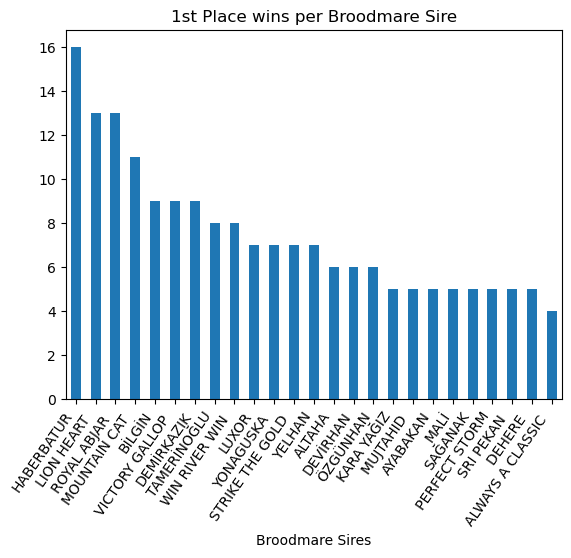

In [57]:
broodmare_sire_win_core = winner_set['hors_broodmare_sire'].value_counts().head(25)

broodmare_sire_win_core.plot(kind = 'bar')
plt.title('1st Place wins per Broodmare Sire')
plt.xlabel('Broodmare Sires')
plt.xticks(rotation=55, ha = 'right')
plt.show()